# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Decision Tree, and will then apply a Decision Tree classsifier on the MNIST hand written digits dataset that we already saw.


## Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer
Put your answer here...

## Implementing Decision Tree From Scratch
In this exercise you will need to implement a simple version of Decision Tree from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes).

* Compelete the skeleton class below
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `min_leaf` is the minimal number of samples in each leaf node
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* To check your decision tree implementation, use the boston dataset (`from sklearn.datasets import load_boston`) split the data set into train and test using (`from sklearn.model_selection import train_test_split`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
    for min_leaf in [1,5,10,100]:
      dt = DecisionTree(X, y, n, sz, min_leaf)
      mse = # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = dt.predict(X_train)  # forest is the chosen model
  plt.scatter(y_hat, y_test)
  ```

In [114]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston;


In [115]:
X, y = load_boston(return_X_y = True);
data = load_boston();
df = pd.DataFrame(data.data, columns = data.feature_names);
df.head()

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [116]:
class Make_Node():
    def __init__(self, feature_idx = None, threshold = None, left = None, right = None, variance = None, value = None):
        self.feature_idx = feature_idx
        self.threshold = threshold
        self.left = left
        self.right = right
        self.variance = variance
        self.value = value #For leaf node

class RegressionTree():
    def __init__(self, max_depth, min_split):
        self.root = None
        self.min_split = min_split
        self.max_depth = max_depth


    def split(self, df, feature_idx, threshold):
        left_child = np.array([sample for sample in df if sample[feature_idx] <= threshold])
        right_child = np.array([sample for sample in df if sample[feature_idx] > threshold])
        return left_child, right_child

    def train_squared_error(self, y, y_left, y_right):

        weight_left = len(y_left) / len(y)
        weight_right = len(y_right)/ len(y)
        variance = weight_left * np.var(y_left) + weight_right * np.var(y_right)

        #code says to subtract the parents error by the error fo the children. Not sure why we aren't just returning the variance of the children.
        return variance 



    def get_leaf(self, y):
        return np.mean(y)

    def best_feature(self, df, n_samples, n_features):
        best_split_dict = {}
        max_reduction = np.inf #Change variable to max_trained_squared_error?

        for feat_idx in range(n_features):
            feat_vals = df[:, feat_idx]
            threshold_options = np.unique(feat_vals)

            for threshold in threshold_options:
                left_child, right_child = self.split(df, feat_idx, threshold)
            
                if len(left_child) > 0 and len(right_child) > 0:
                    y, left_y, right_y = df[:, -1], left_child[:, -1], right_child[:, -1]

                    trained_squared_error = self.train_squared_error(y, left_y, right_y)

                    if trained_squared_error < max_reduction: #We want minimum variance. (If the trained_error function were to subtract frm the variance of the parent, flip to greater than).
                            best_split_dict["feature_idx"] = feat_idx
                            best_split_dict["threshold"] = threshold
                            best_split_dict["left_child"] = left_child
                            best_split_dict["right_child"] = right_child
                            best_split_dict["variance"] = trained_squared_error
                            max_reduction = trained_squared_error
        
        return best_split_dict


    def fit(self, X, y):
        df = np.concatenate((X, y), axis =1)
        self.root = self.build_tree(df)



    def build_tree(self, df, level = 0):
        X, y = df[:, :-1], df[:,-1]
        n_samples, n_features = np.shape(X)
        best_split = {} #hold all features of the split in  dict.
        if n_samples>= self.min_split and level <=self.max_depth:    #a1) Find the best feature for our tree to split on, if we haven't reached past our required tree size.

            best_split = self.best_feature(df, n_samples, n_features)

            if best_split['variance'] > 0:                          #a2) Split the tree based off this best feature into left and right subtrees
                left_tree = self.build_tree(best_split['left_child'], level +1)
                right_tree = self.build_tree(best_split['right_child'], level+1)

                return Make_Node(best_split['feature_idx'], best_split['threshold'], left_tree, right_tree, best_split['variance']) #a3) Make current split into Parent Node
        
        leaf = self.get_leaf(y)                                      #b1) if tree size has already been reached, (or reduction = 0), then create and return a Leaf Node.

        return Make_Node(value = leaf)


  

    def print_tree(self, tree=None, indent=" ", columns = None, level = 0, child = 'root' ):
            ''' function to print the tree '''
            self.columns = columns
            level+= 1

            if not tree:
                tree = self.root

            if tree.value is not None: #If there is value, this means it is a leaf node: return the regression value in this leaf node.
                print(' '*level*3, child, ': ',np.round(tree.value, 4))

            else: #Perform Pre-order traversal-- Root, Left, Right, (leaf).
                if self.columns is None: #If no column names were given, just print by column idx
                    print(f'{child}: X_{str(tree.feature_idx)}, "<=", {tree.threshold}, "?", {tree.variance}')
                    
                else:
                    print(' '*level*3, f'{child}: X_{self.columns[tree.feature_idx]}, "<=", {tree.threshold}, "?", {np.round(tree.variance, 4)}')

                    # print(indent, " |%sleft: " % (indent))
                    self.print_tree(tree.left, indent + indent, self.columns, level, child = 'left')
                    # print(indent, " |%sright :" % (indent), end)
                    self.print_tree(tree.right, indent + indent, self.columns, level, child = 'right')


    def make_prediction(self, x, root):

        if root.value:
            return root.value
        
        if x[root.feature_idx] < root.threshold:
            return self.make_prediction(x, root.left)

        else:
            return self.make_prediction(x, root.right)



    def predict(self, X):
        ''' function to predict a single data point '''
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions


In [117]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [118]:
regressor = RegressionTree(min_split=2, max_depth=20)
regressor.fit(X_train, Y_train)
regressor.print_tree(columns= df.columns)

    root: X_INDUS, "<=", 7.38, "?", 32.2873
       left: X_RM, "<=", 6.23, "?", 8.5301
          left: X_AGE, "<=", 89.8, "?", 7.7302
             left: X_AGE, "<=", 69.6, "?", 5.0009
                left: X_AGE, "<=", 29.2, "?", 3.4346
                   left: X_CRIM, "<=", 0.05789, "?", 0.3838
                      left: X_NOX, "<=", 0.392, "?", 0.0369
                         left :  9.25
                         right: X_NOX, "<=", 0.4379, "?", 0.0103
                            left: X_CRIM, "<=", 0.03466, "?", 0.0004
                               left :  7.83
                               right :  8.075
                            right :  8.43
                      right: X_CRIM, "<=", 0.10659, "?", 0.0561
                         left :  5.57
                         right :  7.15
                   right: X_CRIM, "<=", 0.08447, "?", 3.1561
                      left: X_B, "<=", 364.61, "?", 1.8736
                         left :  12.8
                         right: X_RM, "<

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
for min_leaf in [2,5,10,100]: #Not working for values of 1 -- Need to fix this. Also, what should max depth be?
      regressor = RegressionTree(min_split=min_leaf, max_depth=20)
      regressor.fit(X_train, Y_train)
      mse = mean_squared_error(Y_test, regressor.predict(X_test)) # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))



min_leaf:2 --- oob mse: 55.08662720588235
min_leaf:5 --- oob mse: 48.14092386982571
min_leaf:10 --- oob mse: 50.37255103040444
min_leaf:100 --- oob mse: 29.07709343474029


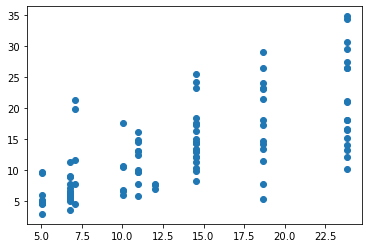

In [120]:
regressor = RegressionTree(min_split=100, max_depth=100)
regressor.fit(X_train, Y_train)
y_hat = regressor.predict(X_test)  # forest is the chosen model
plt.scatter(y_hat, Y_test)

## Using Decision Treefor Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
  - You can use `sklearn.tree.DecisionTreeClassifier`
- Once you are satisfied with the model parameters, plot the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data. (confusion matrix)
- Discuss your results.

In [121]:
# code and answer go he

from sklearn.tree import DecisionTreeClassifier
from keras.datasets import mnist; 

In [122]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = [x.flatten() for x in x_train]
x_test = [x.flatten() for x in x_test]


In [123]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score

Min_samples_split

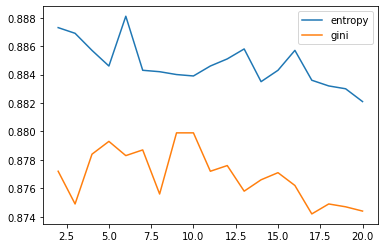

In [144]:
min_samples_split = list(range(2,21))
split_entropy_accuracy = []
for x in min_samples_split:
    
    DT = DecisionTreeClassifier(min_samples_split = x, criterion='entropy') #With no other hyperparamters, 'entropy is higher than gini.
    DT.fit(x_train, y_train)
    split_entropy_accuracy.append(accuracy_score(y_test, DT.predict(x_test)))

plt.plot(min_samples_split, split_entropy_accuracy)

split_gini_accuracy = []
for x in min_samples_split:
    DT = DecisionTreeClassifier(min_samples_split = x, criterion='gini') #With no other hyperparamters, 'entropy is higher than gini.
    DT.fit(x_train, y_train)
    split_gini_accuracy.append(accuracy_score(y_test, DT.predict(x_test)))

plt.plot(min_samples_split, split_gini_accuracy)
plt.legend(['entropy', 'gini'])

In [129]:
from sklearn.model_selection import GridSearchCV

min_samples_split = [5,10,20]
max_depth = [10,20,40]
criterion = ['gini']

parameters = dict(min_samples_split = min_samples_split,
                      criterion=criterion,
                      max_depth=max_depth)

CV = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5 )

CV.fit(x_train, y_train)




GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 40],
                         'min_samples_split': [5, 10, 20]})

In [130]:
print('Best Criterion:', CV.best_estimator_.get_params()['min_samples_split'])
print('Best max_depth:', CV.best_estimator_.get_params()['criterion'])
print('Best Number Of Components:', CV.best_estimator_.get_params()['max_depth'])
print(); print(CV.best_estimator_.get_params())

Best Criterion: 5
Best max_depth: gini
Best Number Of Components: 20

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [136]:
df = pd.DataFrame(CV.cv_results_)
df[['param_min_samples_split', 'param_max_depth', 'mean_test_score']]

,param_min_samples_split,param_max_depth,mean_test_score
0,5,10,0.849667
1,10,10,0.849017
2,20,10,0.847983
3,5,20,0.867917
4,10,20,0.867367
5,20,20,0.863417
6,5,40,0.866283
7,10,40,0.866167
8,20,40,0.862300
